Raoul Island Lake Monitoring Data - Display of 'Recent' Data
--

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from obspy.core import UTCDateTime
from obspy.clients.fdsn import Client

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#GeoNet's FDSN web servers
arc_client = 'http://service.geonet.org.nz'
nrt_client = 'http://beta-service-nrt.geonet.org.nz'

In [4]:
#function to get a stream from both FDSN clients
def waveboth(date1, date2, net, sta, loc, cmp):
  #get data from a FDSN web server for days date1 to date2 inclusive
  global stnrt
  global starc
  time1 = UTCDateTime(date1)
  time2 = UTCDateTime(date2)
  
  #nrt client
  try:
    client = Client(nrt_client)
    stnrt = client.get_waveforms(net, sta, loc, cmp, time1, time2, attach_response=True)
    print 'nrt client successful'
  except:
    print 'nrt client not successful'

  #arc client
  try:
    client = Client(arc_client)
    starc = client.get_waveforms(net, sta, loc, cmp, time1, time2, attach_response=True)
    print 'arc client successful'
  except:
    print 'arc client not successful'

In [5]:
#channel data for fdsn
net = 'NZ'
sta = 'GLKZ'

<span style="color:red">**Change this to select number of days of data to plot**</span>

In [6]:
#get data upto how many days before now
ndays = 15

In [7]:
#channel specific parameters
chan = [{'loc':'80', 'cmp':'LKO', 'subject':'green lake temperature', 'trace':'glt'},
        {'loc':'81', 'cmp':'LKO', 'subject':'marker bay temperature', 'trace':'mbt'},
        {'loc':'40', 'cmp':'LTH', 'subject':'green lake level', 'trace':'gll'}]

In [8]:
def make_trace(n):
    global st
    cmp = chan[n]['cmp']
    loc = chan[n]['loc']
    subject = chan[n]['subject']
    print cmp, loc, subject
    
    #last date to process = now
    dt2 = UTCDateTime()
    dt2str = dt2.strftime('%Y-%m-%d')

    #find first date to process
    dt1 = dt2 - (ndays * 86400)
    dt1str = dt1.date.strftime('%Y-%m-%d')

    print 'first date to process '+dt1str
    print 'last date to process '+dt2str

    waveboth(dt1, dt2, net, sta, loc, cmp)
    
    st = stnrt
    if ndays > 8: #so both FDSN servers have useful data
        st += starc
    st.remove_sensitivity()
    st.merge(fill_value = 'interpolate')
    tr = st[0]
    print
    return(tr)

**Create traces for recent data , decimate to 1 minute sampling**

In [9]:
#glt
glt = make_trace(0)
glt.decimate(factor=10, strict_length=False, no_filter=True)
glt.decimate(factor=6, strict_length=False, no_filter=True)

#mbt
mbt = make_trace(1)
mbt.decimate(factor=10, strict_length=False, no_filter=True)
mbt.decimate(factor=6, strict_length=False, no_filter=True)

#gll
gll = make_trace(2)
gll.decimate(factor=10, strict_length=False, no_filter=True)
gll.decimate(factor=6, strict_length=False, no_filter=True)

LKO 80 green lake temperature
first date to process 2017-12-27
last date to process 2018-01-11
nrt client successful
arc client successful

LKO 81 marker bay temperature
first date to process 2017-12-27
last date to process 2018-01-11
nrt client successful
arc client successful

LTH 40 green lake level
first date to process 2017-12-27
last date to process 2018-01-11
nrt client successful
arc client successful



NZ.GLKZ.40.LTH | 2017-12-27T02:07:52.071800Z - 2018-01-11T02:01:52.071800Z | 60.0 s, 21595 samples

**Plot data**

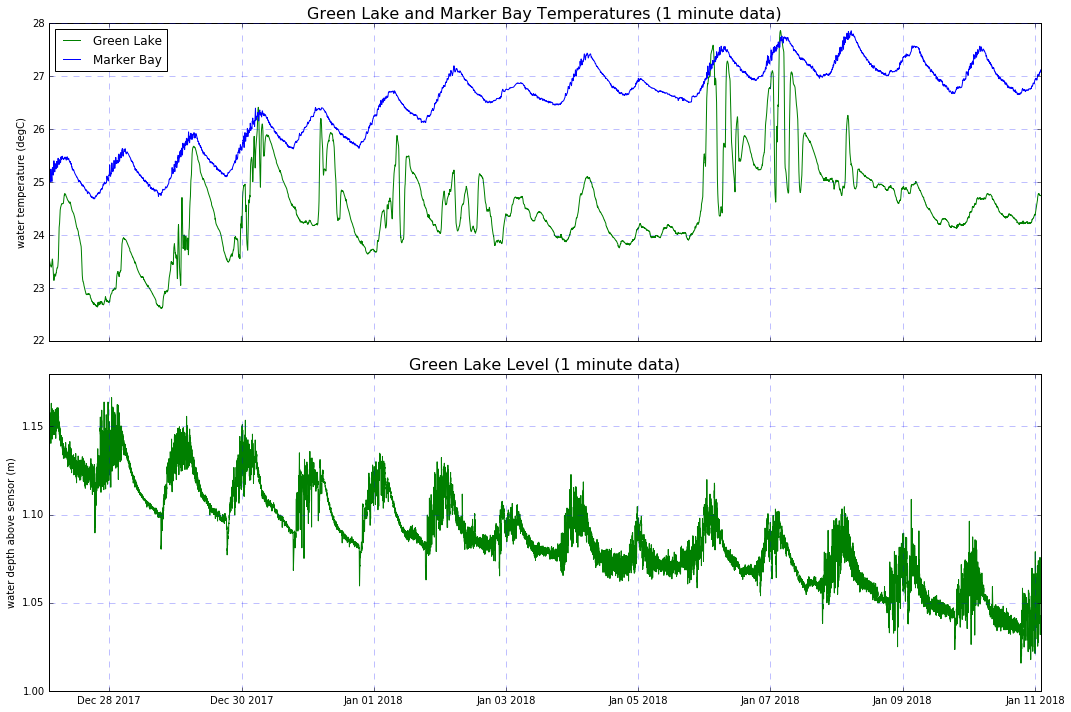

In [10]:
fig, (temps, level) = plt.subplots(nrows=2,ncols=1, sharex=True, figsize=(15,10))

temps.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
temps.plot(glt.times("matplotlib"), glt.data, 'green', label='Green Lake')
temps.plot(mbt.times("matplotlib"), mbt.data, 'blue', label='Marker Bay')
temps.set_ylabel('water temperature (degC)')
temps.legend(loc='best')
temps.set_title('Green Lake and Marker Bay Temperatures (1 minute data)', fontsize=16)
temps.xaxis_date()

level.grid(b=True, which='major', color='b', linestyle='--', alpha=0.5)
level.plot(gll.times("matplotlib"), gll.data, 'green')
level.set_ylabel('water depth above sensor (m)')
level.set_title('Green Lake Level (1 minute data)', fontsize=16)

plt.tight_layout()
fig.savefig('recent.png', dpi=200)